<a href="https://colab.research.google.com/github/KevinaZeni/Home_Away_Goal_Prediction/blob/main/Home_Away_Goal_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Goal Predictions using Machine Learning Algorithms

**Overview**

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

**Input**: Home team, Away team, Tournament type (World cup, Friendly, Other)

**Approach 1: Polynomial approach**

What to train given:

Rank of home team
Rank of away team
Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

**Approach 2: Logistic approach**

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)



 

**Defining our research question**

Predicting the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

**Experimental Design Steps**

This is the flow of the analysis:

Perform the Exploratory Data Analysis

Perform any necessary feature engineering

Check for multicollinearity

Start building the model

Cross-validate the model

Compute the RMSE

Create residual plots for your models, and assess their heteroskedasticity using the Bartlett’s test

Perform appropriate regressions on the data including your justification

Challenge your solution by providing insights on how you can make improvements

**Reading our dataset to understand the variables**

In [4]:
##Importing our libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
##Loading the datasets

fifa_ranking = pd.read_csv('fifa_ranking.csv')

In [6]:
##Previewing our fifa ranking dataset

fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08-08-93
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08-08-93
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08-08-93
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08-08-93
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,08-08-93


In [7]:
fifa_ranking.shape

(57793, 16)

In [8]:
##Loading our results dataset

results= pd.read_csv('results.csv')

In [9]:
##Previewing the first ten rows of our results dataset
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [10]:
results.shape

(40839, 9)

Information about our datasets

In [11]:
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [12]:
results.info

<bound method DataFrame.info of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

##**Data Cleaning**

Checking for completeness in our data

In [13]:
#Finding missing values in our datasets

In [14]:
fifa_ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There are no missing values in our fifa ranking dataset

In [15]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

There are no missing values in our dataset

Checking for consistency

In [16]:
##Find if our datasets have any duplicates

In [17]:
fifa_ranking.duplicated().sum()

37

In [18]:
results.duplicated().any()

False

In [19]:
##Dealing with our duplicates

In [20]:
fifa_ranking= fifa_ranking.drop_duplicates()

In [21]:
fifa_ranking.shape

(57756, 16)

In [22]:
##We realized that the date time has been listed as an object type. We need to change it to datetime

In [23]:
#Changing the date (object) in fifa ranking to datetime

fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])



In [24]:
#Renaming our country columns
fifa_ranking.country_full = fifa_ranking.rename({'country_full': 'country'}, axis = 1, inplace = True)


In [25]:
fifa_ranking.dtypes

rank                                int64
country                            object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [26]:
##Changing date in the results dataset to datetime

results['date'] = pd.to_datetime(results['date'])

In [27]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [28]:
##Creating two new columns for date and month

fifa_ranking['year'] = fifa_ranking.rank_date.dt.year

fifa_ranking['month'] = fifa_ranking.rank_date.dt.month

In [29]:
fifa_ranking.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'year', 'month'],
      dtype='object')

In [30]:
results['year'] = results.date.dt.year

results['month'] = results.date.dt.month

In [31]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

Checking for validity

In [32]:
##We will drop some columns that we do not need

In [33]:
fifa_ranking.drop(columns=['cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
       'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'country_abrv'], inplace=True)

In [34]:
fifa_ranking.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'confederation', 'rank_date', 'year', 'month'],
      dtype='object')

In [35]:
results.drop(columns=['city'],inplace=True)

Checking for Outliers and anomalies 

In [36]:
fifa_ranking.nunique()

rank                 209
country              216
total_points       11114
previous_points     1557
rank_change          121
confederation          6
rank_date            286
year                  26
month                 12
dtype: int64

In [37]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
country         266
neutral           2
year            148
month            12
dtype: int64

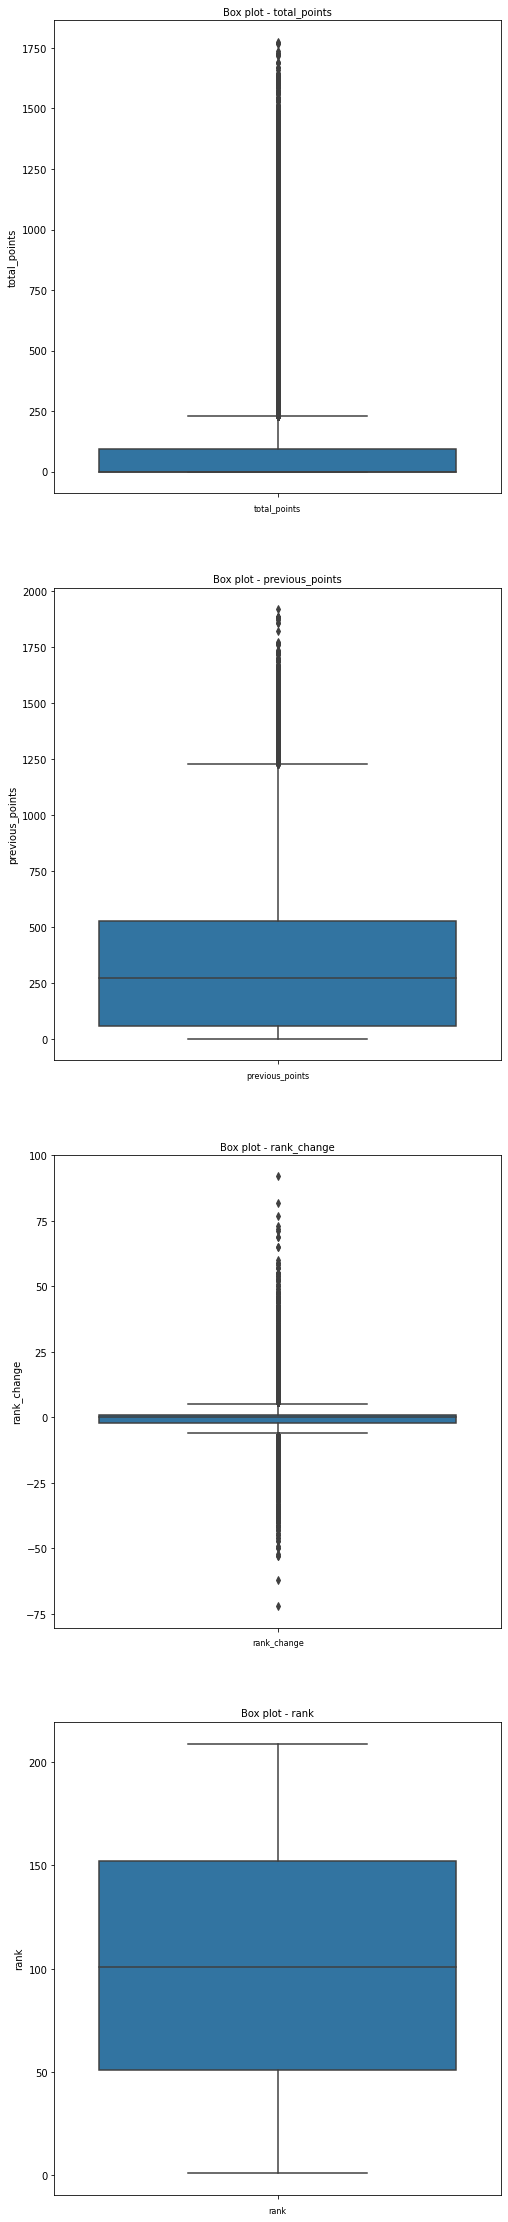

In [38]:
#checking for outliers in our fifa dataset
col_names = ['total_points','previous_points','rank_change','rank']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = fifa_ranking[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

From the above visualizations, we see that both datasets have a number of outliers which we will leave as is 

**Merging our datasets**

In [39]:
fifa_ranking['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [40]:
results.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

We can see that the fifa ranking years start from 1993 we need to filter our results data which runs from 1872 to match

In [41]:
results = results [results['date']>='1993']

In [42]:
#Confirming that the changes have been made
results.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

Obtaining our home rank

In [43]:
## Obtaining home rank and away ranks 

home_rank = pd.merge(fifa_ranking, results, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','home_team'])


In [44]:
home_rank.columns

Index(['rank', 'country_x', 'total_points', 'previous_points', 'rank_change',
       'confederation', 'rank_date', 'year', 'month', 'date', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'country_y',
       'neutral'],
      dtype='object')

In [45]:
#Renaming our rank column
home_rank['rank'] = home_rank.rename({'rank': 'home_rank'}, axis = 1, inplace = True)
home_rank.country_x = home_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [46]:
home_rank.columns

Index(['home_rank', 'country', 'total_points', 'previous_points',
       'rank_change', 'confederation', 'rank_date', 'year', 'month', 'date',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country_y', 'neutral', 'rank'],
      dtype='object')

In [47]:
#Dropping irrelevant columns
home_rank.drop(columns=['country_y','rank_date','date'], inplace=True)
home_rank.drop(columns=['rank'],inplace=True)

In [48]:
home_rank = home_rank[['home_rank','rank_change','country','home_team','away_team','home_score','away_score','tournament','neutral','month','year','total_points','previous_points']]

In [49]:
home_rank.head(10)

,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points
0,4,0,Sweden,Sweden,Switzerland,1,2,Friendly,False,8,1993,0.0,55
1,4,0,Sweden,Sweden,France,1,1,FIFA World Cup qualification,False,8,1993,0.0,55
2,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51
3,5,5,Argentina,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,8,1993,0.0,51
4,8,-5,Brazil,Brazil,Mexico,1,1,Friendly,False,8,1993,0.0,55
5,8,-5,Brazil,Brazil,Ecuador,2,0,FIFA World Cup qualification,False,8,1993,0.0,55
6,8,-5,Brazil,Brazil,Bolivia,6,0,FIFA World Cup qualification,False,8,1993,0.0,55
7,10,-1,Denmark,Denmark,Lithuania,4,0,FIFA World Cup qualification,False,8,1993,0.0,51
8,19,16,Colombia,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,8,1993,0.0,36
9,19,16,Colombia,Colombia,Argentina,2,1,FIFA World Cup qualification,False,8,1993,0.0,36


Obtaining our away rank

In [50]:
away_rank= pd.merge(fifa_ranking, results, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','away_team'])

In [51]:
away_rank.drop(columns=['country_y','rank_date','date'], inplace=True)
#away_rank.drop(columns=['rank'],inplace=True)

In [52]:
# Renaming our country column
away_rank.country_x = away_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [53]:
#Renaming our rank column
away_rank['rank'] = away_rank.rename({'rank': 'away_rank'}, axis = 1, inplace = True)


In [54]:
away_rank.drop(columns=['rank'],inplace=True)

In [55]:
away_rank = away_rank[['away_rank','away_team','month','year','confederation']]
## away_rank = away_rank[['away_rank','rank_change','country','home_team','away_team','home_score','away_score','tournament','neutral','month','year','total_points','previous_points']]

In [56]:
away_rank.head(10)

,away_rank,away_team,month,year,confederation
0,3,Switzerland,8,1993,UEFA
1,5,Argentina,8,1993,CONMEBOL
2,5,Argentina,8,1993,CONMEBOL
3,5,Argentina,8,1993,CONMEBOL
4,8,Brazil,8,1993,CONMEBOL
5,8,Brazil,8,1993,CONMEBOL
6,9,Norway,8,1993,UEFA
7,12,France,8,1993,UEFA
8,14,Mexico,8,1993,CONCACAF
9,19,Colombia,8,1993,CONMEBOL


In [57]:
## Merging our datasets
dff = pd.merge(home_rank, away_rank, how = 'inner', left_on = ['year', 'month','away_team'], right_on = ['year', 'month','away_team'])
#home_away = pd.merge(home_rank,away_rank, how='inner', )
##dff = pd.merge(home_rank, away_rank, how='inner', left_on=['year','month', 'away_team', 'home_score', 'away_score', 'home_team', 'tournament', 'country'], right_on=['year','month', 'away_team', 'home_score', 'away_score', 'home_team', 'tournament', 'country'])


In [58]:
#Previewing our new dataset
dff.tail(10)

,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points,away_rank,confederation
36000,7,0,France,France,Croatia,4,2,FIFA World Cup,True,7,2018,1198.13,1166,20,UEFA
36001,7,0,France,France,Croatia,4,2,FIFA World Cup,True,7,2018,1198.13,1166,20,UEFA
36002,70,-4,Russia,Russia,Croatia,2,2,FIFA World Cup,False,7,2018,456.53,493,20,UEFA
36003,70,-4,Russia,Russia,Croatia,2,2,FIFA World Cup,False,7,2018,456.53,493,20,UEFA
36004,14,3,Uruguay,Uruguay,France,0,2,FIFA World Cup,True,7,2018,1018.41,976,7,UEFA
36005,20,-2,Croatia,Croatia,Denmark,1,1,FIFA World Cup,True,7,2018,945.18,975,12,UEFA
36006,24,-1,Sweden,Sweden,Switzerland,1,0,FIFA World Cup,True,7,2018,879.90,889,6,UEFA
36007,70,-4,Russia,Russia,Spain,1,1,FIFA World Cup,False,7,2018,456.53,493,10,UEFA
36008,158,-7,Liberia,Liberia,Sierra Leone,0,0,Friendly,False,7,2018,129.08,167,111,CAF
36009,171,0,Malaysia,Malaysia,Fiji,1,0,Friendly,False,7,2018,93.04,104,165,OFC


In [59]:
## Since we merged our dataset, we need to clean the data once more

In [60]:
##checking for duplicates
dff.duplicated().any()

True

In [61]:
dff= dff.drop_duplicates()


In [62]:
## Confirming we no longer have duplicates

dff.duplicated().sum()

0

In [63]:
dff.columns

Index(['home_rank', 'rank_change', 'country', 'home_team', 'away_team',
       'home_score', 'away_score', 'tournament', 'neutral', 'month', 'year',
       'total_points', 'previous_points', 'away_rank', 'confederation'],
      dtype='object')

#**Exploratory Data Analysis**

To gather more insights on the characteristics of both datasets

In [64]:
##Displaying fifa ranking summaries by descriptive analysis

fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,year,month
count,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000
mean,101.618118,121.971151,332.339965,-0.009938,2006.173021,6.957667
std,58.635096,260.479191,302.964176,5.802788,7.032679,3.596864
min,1.000000,0.000000,0.000000,-72.000000,1993.000000,1.000000
25%,51.000000,0.000000,56.000000,-2.000000,2000.000000,4.000000
50%,101.000000,0.000000,272.000000,0.000000,2006.000000,7.000000
75%,152.000000,91.500000,525.000000,1.000000,2012.000000,10.000000
max,209.000000,1775.030000,1920.000000,92.000000,2018.000000,12.000000


In [65]:
##Displaying results summaries

results.describe()

,home_score,away_score,year,month
count,23478.000000,23478.000000,23478.000000,23478.000000
mean,1.650992,1.100009,2006.408510,6.721015
std,1.704275,1.349406,7.410476,3.244628
min,0.000000,0.000000,1993.000000,1.000000
25%,0.000000,0.000000,2000.000000,4.000000
50%,1.000000,1.000000,2007.000000,6.000000
75%,2.000000,2.000000,2013.000000,10.000000
max,31.000000,21.000000,2019.000000,12.000000


**a) Univariate Analysis**

Measures of Central tendancy

In [66]:
mode = results[['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
        'country', 'neutral', 'year', 'month']].mode()
mode



,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
0,United States,Zambia,1,0,Friendly,United States,False,2008,6


In [67]:
mode= fifa_ranking[['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'confederation', 'rank_date', 'year', 'month']].mode()
mode.head(1)

,rank,country,total_points,previous_points,rank_change,confederation,rank_date,year,month
0,147.0,Sudan,0.0,0.0,0.0,UEFA,2016-09-15,2017.0,12.0


In [68]:
dff.median()

home_rank            74.0
rank_change           0.0
home_score            1.0
away_score            1.0
neutral               0.0
month                 9.0
year               2008.0
total_points          0.0
previous_points     410.0
away_rank            76.0
dtype: float64

In [69]:
dff.mean()

home_rank            78.930668
rank_change           0.851363
home_score            1.562494
away_score            1.070520
neutral               0.234590
month                 7.444487
year               2007.528255
total_points        182.590949
previous_points     435.929291
away_rank            81.161981
dtype: float64

In [70]:
##The mean, median an quantiles of the numerical variables are stated in our analysis results above

In [71]:
##Visualizing the univariate analysis of our categorical variables in the fifa dataset

In [72]:
dff.columns

Index(['home_rank', 'rank_change', 'country', 'home_team', 'away_team',
       'home_score', 'away_score', 'tournament', 'neutral', 'month', 'year',
       'total_points', 'previous_points', 'away_rank', 'confederation'],
      dtype='object')

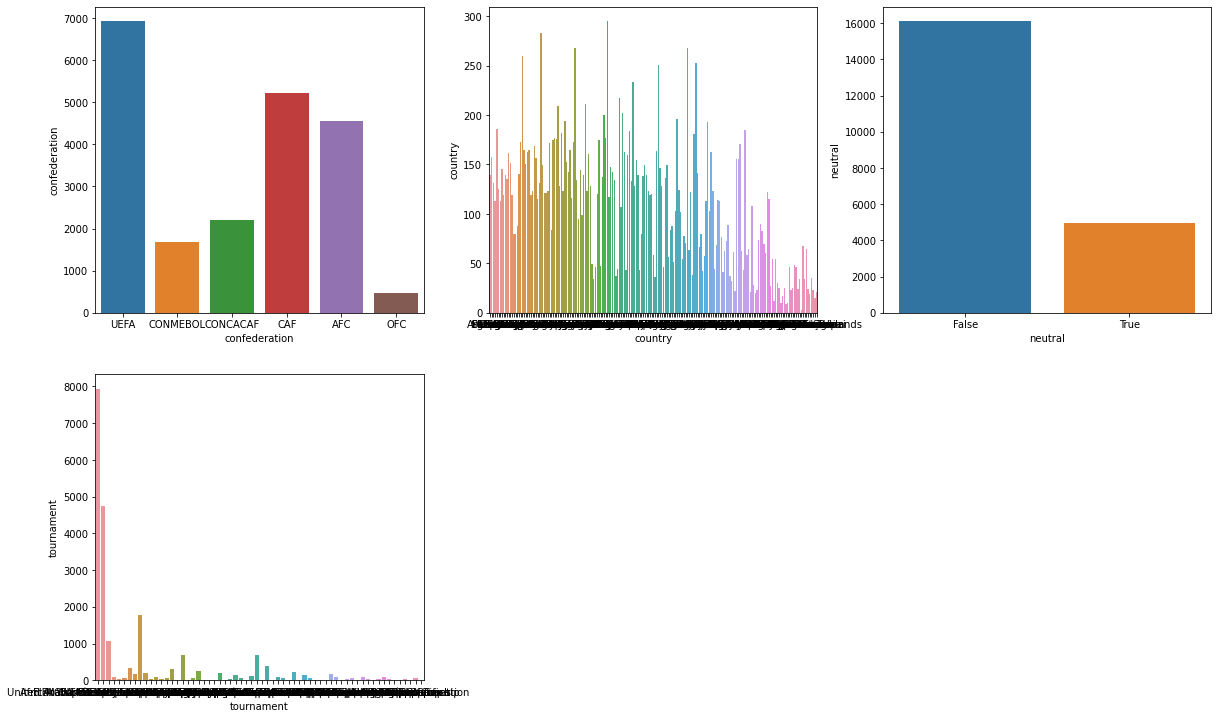

In [73]:
columns=['confederation','country','neutral','tournament']
plt.figure(figsize=(20,80),facecolor='white')
plotnumber=1
for col in columns:
  ax=plt.subplot(12,3,plotnumber)
  sns.countplot(data=dff, x=col)
  plt.xlabel(col)
  plt.ylabel(col)
  plotnumber+=1
plt.show()

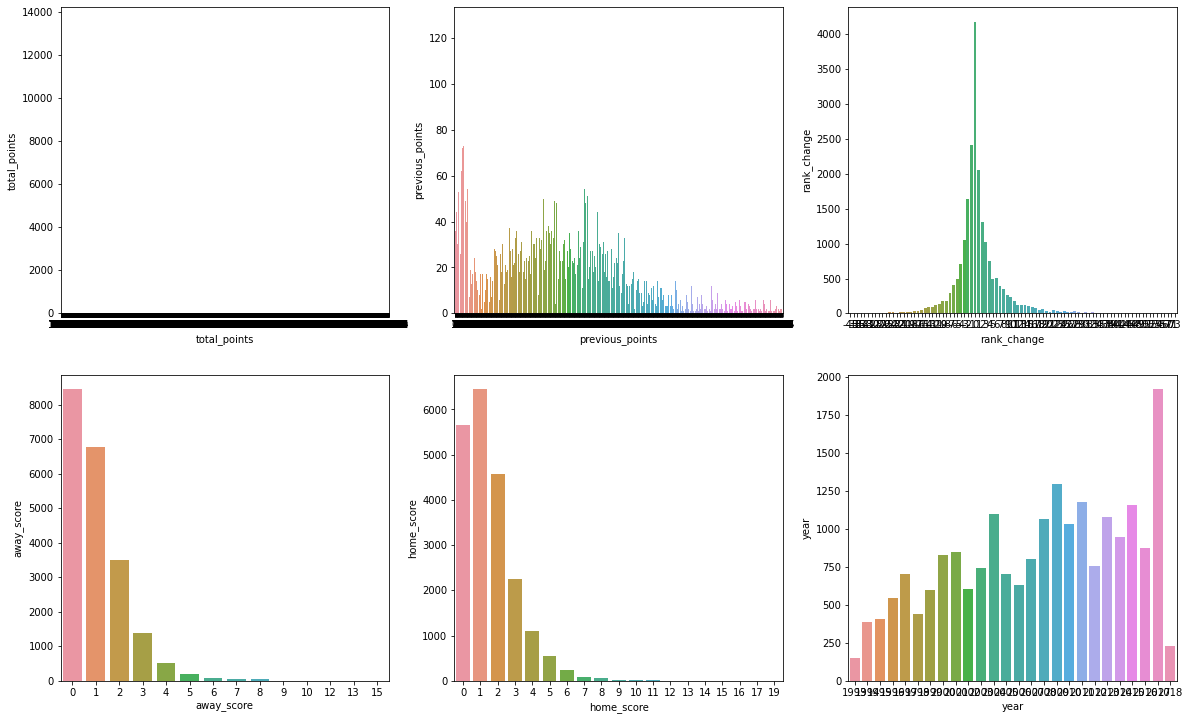

In [74]:
columns=['total_points','previous_points','rank_change','away_score','home_score','year']
plt.figure(figsize=(20,80),facecolor='white')
plotnumber=1
for col in columns:
  ax=plt.subplot(12,3,plotnumber)
  sns.countplot(data=dff, x=col)
  plt.xlabel(col)
  plt.ylabel(col)
  plotnumber+=1
plt.show()

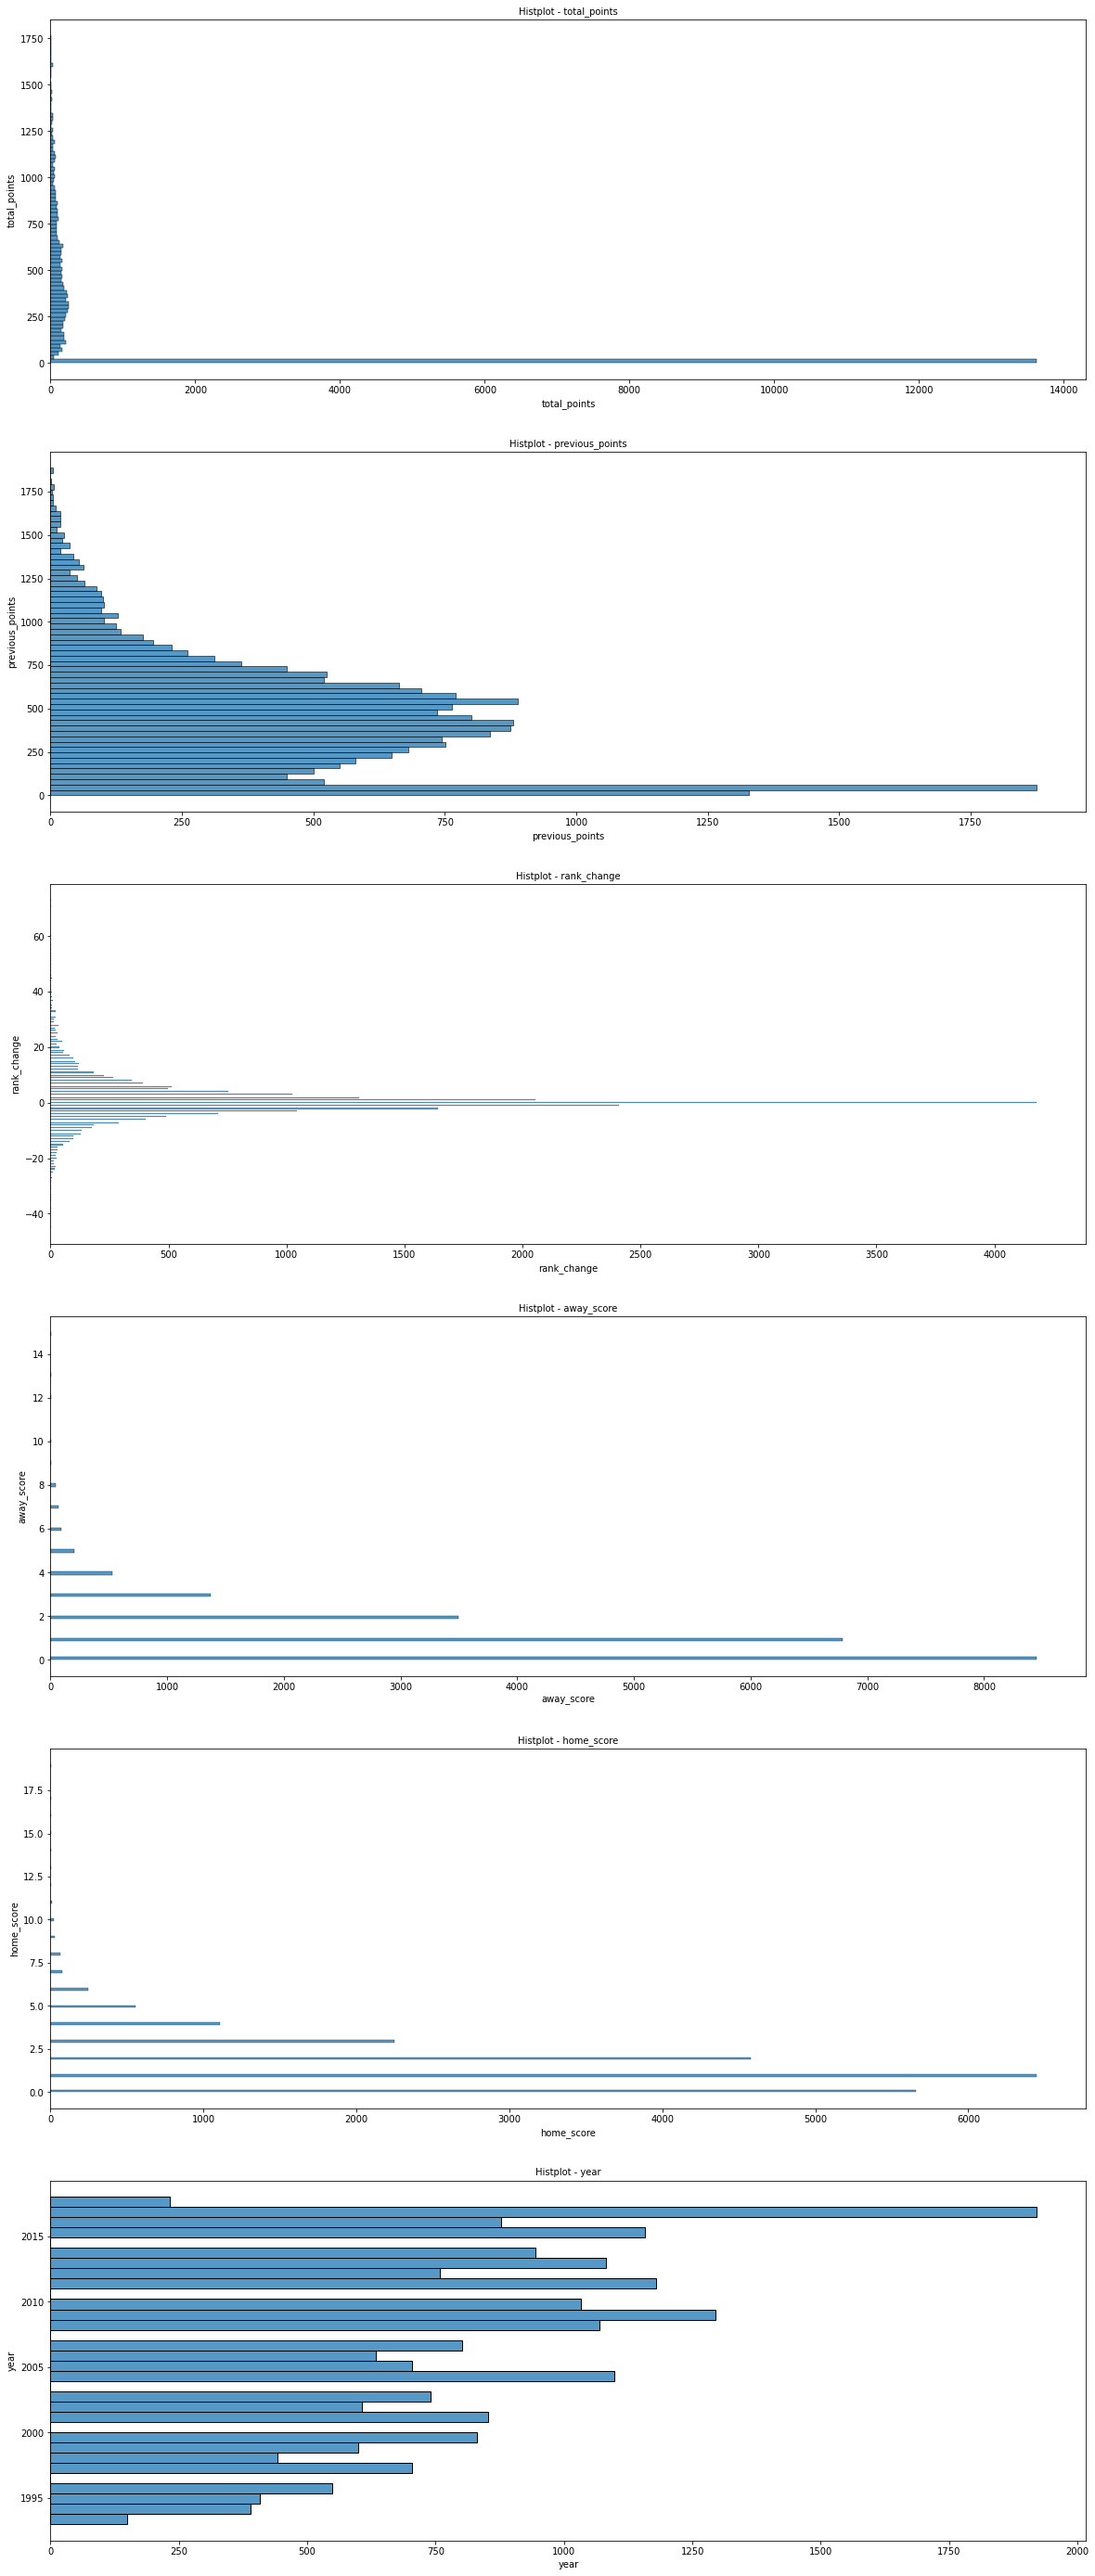

In [75]:
col_names = ['total_points','previous_points','rank_change','away_score','home_score','year']

fig, ax = plt.subplots(len(col_names), figsize= (20,50))

for i, col_val in enumerate(col_names):
  sns.histplot(y = dff[col_val], ax= ax[i])
  ax[i].set_title('Histplot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 10)
plt.show()

From the above we can wee that most of the team in the fifa ranking are in the UEFA and CAF confederations

**b) Bivariate Analysis**

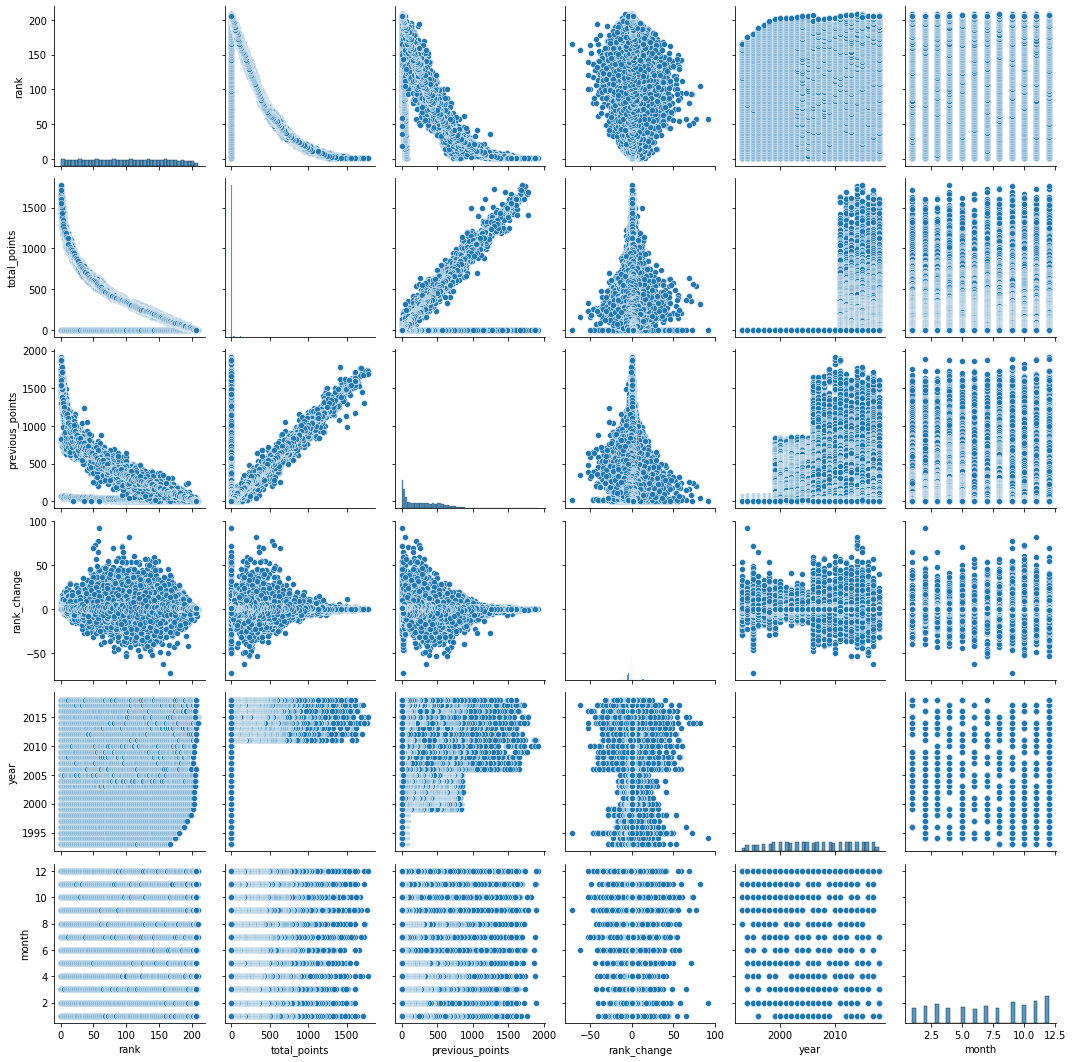

In [76]:
#Bivariate Analysis summary for fifa numerica variables
sns.pairplot(fifa_ranking)
plt.show()

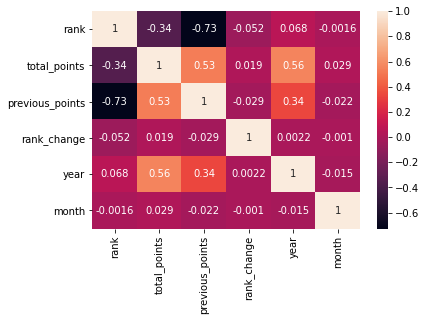

In [77]:
sns.heatmap(fifa_ranking.corr(),annot=True)
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


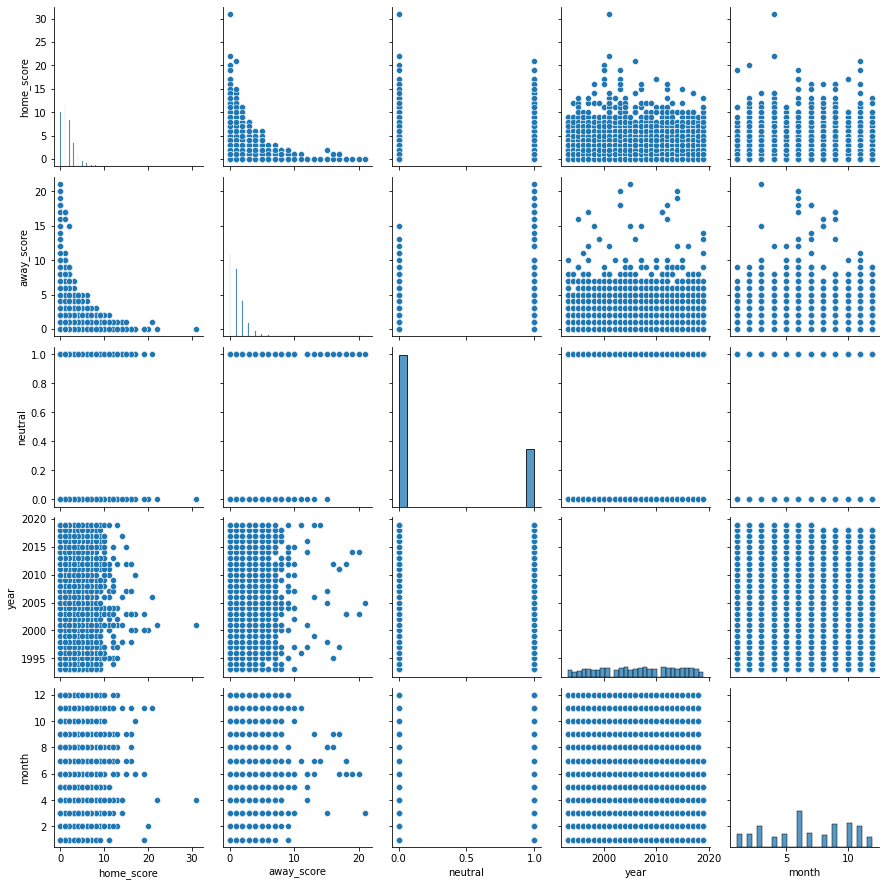

In [78]:
#Bivariate Analyis summary for the results data numerical variables

sns.pairplot(results)
plt.show()

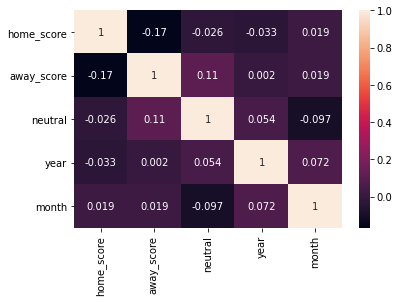

In [79]:
sns.heatmap(results.corr(),annot=True)
plt.show()

**c) Multivariate Analysis**

In [80]:
#We will perform LDA to find the features most important for our models

# Model 1: Predicting home goals
# Model 2: Predicting away goals

Using home score as our predictive features

In [81]:
columns=['home_rank', 'rank_change', 'country', 'home_team', 'away_team',
        'away_score', 'tournament', 'neutral', 'month', 'year',
       'total_points', 'previous_points', 'away_rank', 'confederation' ]

In [82]:
#converting categorical values to numeric
from sklearn.preprocessing import LabelEncoder
for col in columns:
  labelencoder = LabelEncoder()
  
  labelencoder.fit(dff[col])
  dff[col] = labelencoder.transform(dff[col])
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21058 entries, 0 to 36009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   home_rank        21058 non-null  int64
 1   rank_change      21058 non-null  int64
 2   country          21058 non-null  int64
 3   home_team        21058 non-null  int64
 4   away_team        21058 non-null  int64
 5   home_score       21058 non-null  int64
 6   away_score       21058 non-null  int64
 7   tournament       21058 non-null  int64
 8   neutral          21058 non-null  int64
 9   month            21058 non-null  int64
 10  year             21058 non-null  int64
 11  total_points     21058 non-null  int64
 12  previous_points  21058 non-null  int64
 13  away_rank        21058 non-null  int64
 14  confederation    21058 non-null  int64
dtypes: int64(15)
memory usage: 3.2 MB


In [83]:
#X = dff.iloc[:, [0, 2, 3, 4, 6, 15, 16]]
X = dff[['home_rank', 'rank_change', 'country', 'home_team', 'away_team',
        'away_score', 'tournament', 'neutral', 'month', 'year',
       'total_points', 'previous_points', 'away_rank', 'confederation']]
y = dff[['home_score']]

In [84]:
X.shape

(21058, 14)

In [85]:
y.shape

(21058, 1)

In [86]:
#Import linear Doscriminant analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#create an instance of LDA
lda=LDA()
lda_=lda.fit(X,y)
lda_x=lda_.transform(X)
lda_.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 1.23499803e-02, -1.95866894e-02,  8.46501081e-06,
         8.46501081e-06,  6.30992376e-04, -8.93064655e-03,
         1.10767290e-04,  2.10505597e-01,  4.68399594e-03,
         1.34858138e-02, -5.67020318e-05,  3.54722720e-05,
        -1.32770313e-02,  2.07555544e-02],
       [ 1.05579117e-03, -2.82498361e-03,  4.21355249e-05,
         4.21355249e-05, -1.38968913e-05, -3.12455278e-02,
        -1.27142698e-03,  6.69725253e-02, -2.23451396e-03,
         8.83836076e-03,  7.75073392e-06, -2.63784065e-04,
        -4.00788441e-03, -1.82596332e-03],
       [-4.12187367e-03,  1.13967673e-02,  8.40215389e-05,
         8.40215389e-05, -1.35195583e-04,  3.19645318e-02,
         9.05493633e-04, -1.18241689e-01, -1.40636369e-02,
        -6.37639574e-03,  1.55108496e-05,  1.51885231e-04,
         3.94273339e-03, -2.96858102e-02],
       [-8.62642750e-03,  1.91168435e-02, -7.39743791e-05,
        -7.39743791e-05, -3.23100826e-04,  1.89326683e-02,
         2.06755133e-03, -1.73029645e-01,  2.

In [87]:
#creating a dataframe to get the name of the columns
df=pd.DataFrame(index=X.columns.values,data=lda_.coef_[0].T)
df.sort_values(0,ascending=False)

,0
neutral,0.210506
confederation,0.020756
year,0.013486
home_rank,0.012350
month,0.004684
away_team,0.000631
tournament,0.000111
previous_points,0.000035
country,0.000008
home_team,0.000008


We can conclude from our LDA analysis, we can use the linear combination of the following features to predict our home score as there is some variablity: Neutral,confederation, year


Using away score as our predictive feature

In [88]:
##Defining our features to train
X = dff[['home_rank', 'rank_change', 'country', 'home_team', 'away_team',
        'home_score', 'tournament', 'neutral', 'month', 'year',
       'total_points', 'previous_points', 'away_rank', 'confederation']]
y = dff[['away_score']]

In [89]:
#create an instance of LDA
lda=LDA()
lda_=lda.fit(X,y)
lda_x=lda_.transform(X)
lda_.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-8.98731358e-03,  1.25289442e-02,  6.09281267e-05,
         6.09281267e-05,  8.33821001e-05, -1.92968328e-02,
        -7.10096365e-04, -2.34817067e-01, -8.86224265e-04,
         4.82457319e-03,  1.43204790e-05, -1.35550739e-04,
         8.67423228e-03, -2.15119130e-02],
       [-1.49375193e-03,  1.72747353e-03, -1.21532890e-04,
        -1.21532890e-04,  2.24003289e-04,  3.86641320e-03,
         1.15973709e-03, -5.03029194e-02, -1.05352179e-02,
         1.65998262e-03, -1.44323568e-05, -1.07877601e-05,
        -5.72737434e-04, -2.96573475e-02],
       [ 7.50606141e-03, -1.41957755e-02,  9.43536993e-06,
         9.43536993e-06, -3.75160725e-04,  2.45495674e-02,
        -7.23451606e-04,  2.79065224e-01,  1.30438710e-02,
         1.09708172e-03, -5.71900628e-05,  5.62728040e-05,
        -7.99698236e-03,  2.59751014e-02],
       [ 1.69322761e-02, -3.00833947e-02,  2.65353441e-04,
         2.65353441e-04, -3.34690880e-04,  3.92626163e-02,
        -9.01362183e-06,  3.68654651e-01, -4.

In [90]:
#creating a dataframe to get the name of the columns
df=pd.DataFrame(index=X.columns.values,data=lda_.coef_[0].T)
df.sort_values(0,ascending=False)

,0
rank_change,0.012529
away_rank,0.008674
year,0.004825
away_team,0.000083
home_team,0.000061
country,0.000061
total_points,0.000014
previous_points,-0.000136
tournament,-0.000710
month,-0.000886


We can conclude from our LDA analysis, we can use the linear combination of the following features to predict the away goals as there is some correlation probability

#**Feature  Engineering**

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [92]:
#We will create a new columns indication the goal difference (home score/ away_score) indicating wins or losses


In [93]:
dff['goal_result'] = dff['home_score'] - dff['away_score']

In [94]:

def scores(home_scores):
    if home_scores > 0:
        return 'Win'
    elif home_scores < 0:
        return 'Loss'
    else:
        return 'Draw'
      
dff['match_result'] = dff.goal_result.apply(lambda h: scores(h))

In [95]:
#Categorizing out tournament types: 
#   FIFA World Cup
#   Friendly
#   Other

def tournament_type(ttype):
    if ttype == 'Friendly':
        return 'Friendly'
    elif ttype == 'FIFA World Cup':
        return 'FIFA World cup'
    else:
        return 'Other'
      
dff['tournament_type'] = dff.tournament.apply(lambda t: tournament_type(t))

In [96]:
#Dropping the columns we don't need
dff.drop(columns=['tournament'], inplace=True)

In [97]:
dff.columns

Index(['home_rank', 'rank_change', 'country', 'home_team', 'away_team',
       'home_score', 'away_score', 'neutral', 'month', 'year', 'total_points',
       'previous_points', 'away_rank', 'confederation', 'goal_result',
       'match_result', 'tournament_type'],
      dtype='object')

In [98]:
dff.head(10)

,home_rank,rank_change,country,home_team,away_team,home_score,away_score,neutral,month,year,total_points,previous_points,away_rank,confederation,goal_result,match_result,tournament_type
0,3,35,167,167,168,1,2,0,7,0,0,55,2,5,-1,Loss,Other
1,3,35,167,167,66,1,1,0,7,0,0,55,11,5,0,Draw,Other
2,4,40,8,8,138,2,1,0,7,0,0,51,69,3,1,Win,Other
5,18,51,41,41,138,4,0,0,7,0,0,36,69,3,4,Win,Other
8,66,36,137,137,138,2,1,0,7,0,0,22,69,3,1,Win,Other
11,4,40,8,8,137,0,0,0,7,0,0,51,66,3,0,Draw,Other
13,18,51,41,41,137,0,0,0,7,0,0,36,66,3,0,Draw,Other
15,7,30,27,27,115,1,1,0,7,0,0,55,13,2,0,Draw,Other
16,7,30,27,27,55,2,0,0,7,0,0,55,34,3,2,Win,Other
19,21,29,184,184,55,0,0,0,7,0,0,47,34,3,0,Draw,Other


#**Checking for multicollinearity**

In [99]:
##Before we build our model, we need to check for intercorrelations among our more independent variables. Multi-collinearity is particularly undesirable because it impacts the interpretability of linear regression models


In [100]:
## We will use a VIF(variance inflation factor) to check for multicollinearity. The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. 
## It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.
## VIF Is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.


In [101]:
corr= dff.corr()
#pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)



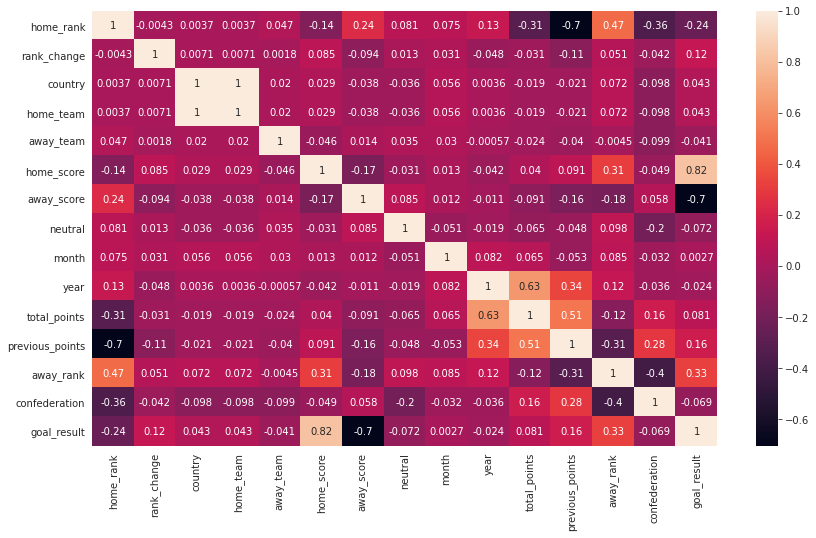

In [102]:
## Plotting a heatmap of the same

sns.set_style('dark')
plt.subplots(figsize =  (14,8))
sns.heatmap(corr, annot = True)
plt.show()

If value exceeds 5, then collinearity should be addressed. In our case, we do not have values exceeding 5 hence can conclude the independent variables are not correlated.

#**Building our models**

In [103]:
## Importing our libraries to use for our models

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.preprocessing import PolynomialFeatures





#Approach 1: Polynomial Regression

**a)Model 1: Predicting the home score using the polynomial approach**

In [104]:
## Defining our dependent and independent variables

#Going by our hint, we will use Home team, Away team, Tournament type (World cup, Friendly, Other) as our independent variables 
#and home score as our dependent variable

In [105]:
dff

,home_rank,rank_change,country,home_team,away_team,home_score,away_score,neutral,month,year,total_points,previous_points,away_rank,confederation,goal_result,match_result,tournament_type
0,3,35,167,167,168,1,2,0,7,0,0,55,2,5,-1,Loss,Other
1,3,35,167,167,66,1,1,0,7,0,0,55,11,5,0,Draw,Other
2,4,40,8,8,138,2,1,0,7,0,0,51,69,3,1,Win,Other
5,18,51,41,41,138,4,0,0,7,0,0,36,69,3,4,Win,Other
8,66,36,137,137,138,2,1,0,7,0,0,22,69,3,1,Win,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36005,19,33,46,46,51,1,1,1,6,25,3386,968,11,5,0,Draw,Other
36006,23,34,167,167,168,1,0,1,6,25,3274,886,5,5,1,Win,Other
36007,69,31,146,146,163,1,1,0,6,25,1936,493,9,5,0,Draw,Other
36008,157,28,101,101,155,0,0,0,6,25,353,167,110,1,0,Draw,Other


In [159]:
X = dff.iloc[:,[0,12,16]]
y = dff.home_score

print(X.head())

print(y.head())

   home_rank  away_rank tournament_type
0          3          2           Other
1          3         11           Other
2          4         69           Other
5         18         69           Other
8         66         69           Other
0    1
1    1
2    2
5    4
8    2
Name: home_score, dtype: int64


In [155]:
X = pd.get_dummies(X, drop_first=True)

In [156]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [157]:
X.shape

(21058, 2)

In [158]:
y.shape

(21058,)

In [160]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [161]:
#Fitting the polynomial features to the X_train and X_test

polynomial_feat = PolynomialFeatures(degree = 4)
X_train = polynomial_feat.fit_transform(X_train)
X_test = polynomial_feat.fit_transform(X_test)

In [162]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
# Making predictions

y_pred = regressor.predict(X_test)

##
dfz= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfz

,Actual,Predicted
673,0,1.106024
23907,1,0.817206
16717,2,2.069483
33274,1,1.796214
28644,0,1.436686
...,...,...
6206,0,1.050129
28474,0,0.454301
11865,1,1.330284
30252,0,0.650005


In [164]:
# Measuring the accuracy of the model using our metrics

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 1.0111618016782429
Mean Squared Error: 1.8608965653643443
Root Mean Squared Error: 1.3641468269084323


In [165]:
## We will use RSME to evaluate the performance of our model. RMSE: Root Mean Square Error is the measure of how well a regression line fits the data points

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.3641468269084323


As we can tell from above, our prediction model is quite high, this is possibly due to the degrees we allocated or othe factors. Increasing the number of variables could result in a better model. 

**Checking for heteroskedasticity using the Bartlett's test**

In [166]:
#Obtaining our residuals by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)
residuals
# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

print('***************')
print("The Residual mean for the model : ", residuals.mean())


        home_score
count  4212.000000
mean      0.008112
std       1.364285
min     -13.815178
25%      -0.686897
50%       0.201210
75%       0.932155
max       4.268384
***************
The Residual mean for the model :  0.008111588149838945


Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.08%

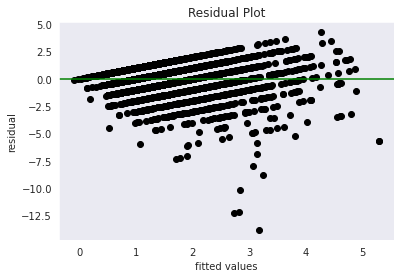

In [167]:
# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

In [168]:
##Bratlett'ts test to confirm that there are no glaring patterns

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('Critical value is', critical_value, 'P value is', p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

Critical value is inf P value is 3.949593860947e-311
the variances are homogeneous!


**Model 2: Predicting the away score using the polynomial approach**

In [ ]:
#We will repeat the steps taken in model one to predict our away score but use the following variables in this instance

#Rank of home team
#Rank of away team
#Tournament type

In [133]:
X = dff.iloc[:,[0,12,16]]
y = dff.away_score

In [134]:
X = pd.get_dummies(X, drop_first=True)

In [135]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [136]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
#Fitting the polynomial features to the X_train and X_test

polynomial_feat = PolynomialFeatures(degree = 4)
X_train = polynomial_feat.fit_transform(X_train)
X_test = polynomial_feat.fit_transform(X_test)

In [142]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
# Making predictions

y_pred = regressor.predict(X_test)

##
dfs= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfs

,Actual,Predicted
673,1,1.460065
23907,1,1.560513
16717,1,0.629920
33274,0,0.727375
28644,0,0.788175
...,...,...
6206,0,1.637255
28474,1,1.714161
11865,2,1.040756
30252,3,2.166837


In [149]:
## We will use RSME to evaluate the performance of our model. RMSE: Root Mean Square Error is the measure of how well a regression line fits the data points

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.1197712255878642


Our RSME is a little higher than we hoped which affects the accuracy of our predicted scores. 

**Checking for heteroskedasticity using the Bartlett's test**

In [150]:
#Obtaining our residuals by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)
residuals
# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

print('***************')
print("The Residual mean for the model : ", residuals.mean())

        away_score
count  4212.000000
mean     -0.004594
std       1.119895
min      -7.584288
25%      -0.540361
50%       0.177444
75%       0.772418
max       4.216334
***************
The Residual mean for the model :  -0.00459400034471568


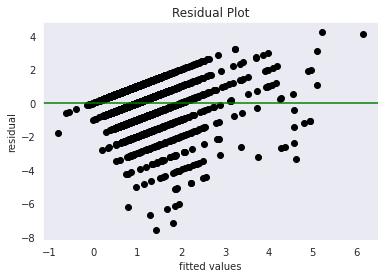

In [151]:
# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

#Approach 2: Logistic Regression

In [ ]:
##Defining our variables..
#Going by the hint, we are to use: Home Team

#Home Team Score, Away Team, Away Team Score, Year, Home Team Rank, Away Team Rank, Tournament Type, Status

In [219]:
# Checking that your dataset size is sufficient
# We have 6 predictive features. The rule of thumb is 50 records per feature 
# so we need to have at least 300 records in this dataset. Let's check again.
#
dff.info()

              
# From the output we have 21058 records so we are fine.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21058 entries, 0 to 36009
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   home_rank        21058 non-null  int64 
 1   rank_change      21058 non-null  int64 
 2   country          21058 non-null  int64 
 3   home_team        21058 non-null  int64 
 4   away_team        21058 non-null  int64 
 5   home_score       21058 non-null  int64 
 6   away_score       21058 non-null  int64 
 7   neutral          21058 non-null  int64 
 8   month            21058 non-null  int64 
 9   year             21058 non-null  int64 
 10  total_points     21058 non-null  int64 
 11  previous_points  21058 non-null  int64 
 12  away_rank        21058 non-null  int64 
 13  confederation    21058 non-null  int64 
 14  goal_result      21058 non-null  int64 
 15  match_result     21058 non-null  object
 16  tournament_type  21058 non-null  object
dtypes: int64(15), object(2)
memory 

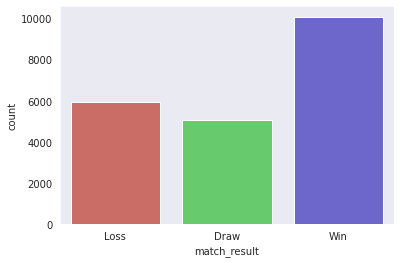

In [192]:
#Since we are building a logistic model to predict the goals, we need to make sure that it is a categorical variable, let's use Seaborn's countplot() function.
# 
import seaborn as sb
sb.countplot(x='match_result',data=dff, palette='hls')



In [ ]:
##match_res = pd.get_dummies(dff['match_result'],drop_first=True)##
##match_res.head()## ignore

In [214]:
X = dff.iloc[:, [0, 3, 4, 6, 9]]
y = dff['match_result']

print(X.head())

print(y.head())

   home_rank  home_team  away_team  away_score  year
0          3        167        168           2     0
1          3        167         66           1     0
2          4          8        138           1     0
5         18         41        138           0     0
8         66        137        138           1     0
0    Loss
1    Draw
2     Win
5     Win
8     Win
Name: match_result, dtype: object


In [215]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [216]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [217]:
##Training our model

logistic = LogisticRegression()
logistic.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
# Making predictions
y_pred = logistic.predict(X_test)

dfa= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfa

,Actual,Predicted
673,Loss,Win
23907,Draw,Win
16717,Win,Win
33274,Win,Win
28644,Draw,Win
...,...,...
6206,Draw,Win
28474,Loss,Draw
11865,Loss,Loss
30252,Loss,Loss


**Evaluating our model using the confusion matrix**

In [221]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[  19,  182,  819],
       [  22,  880,  306],
       [  21,  130, 1833]])

The results from the confusion matrix tell us our model correctly predicted 2,732 results and some incorrect assessments meaning that it might not be very accurate in predictions

In [222]:
##We can further confirm the accuracy of our model using the f1 score

print("The accuracy is", {accuracy_score(y_test, y_pred)})
print("The f1 score is: ", {f1_score(y_test, y_pred, average = "macro")})

## Our logistic prediction was only 64% accurate which is low

The accuracy of the model is {0.6486229819563153}
The f1 score of the model is {0.5034194728266665}


#**Challenging our solution**

From our analysis and prediction model, we can see that the polynomial regressor built better models for prediction compared to our logistic regression model which was only 69% accurate.
This could have been as a result of factors such as the features not being that efficient in prediction or errors made by the data scientist during the cleaning process.

We can try to predict using other models and find the one with the highest accuracy.
